# Saturdays.AI Guadalajara 4a Ed.
### Feature Encoding

#### Luis Román

### Septiembre de 2022

### California Housing Prices
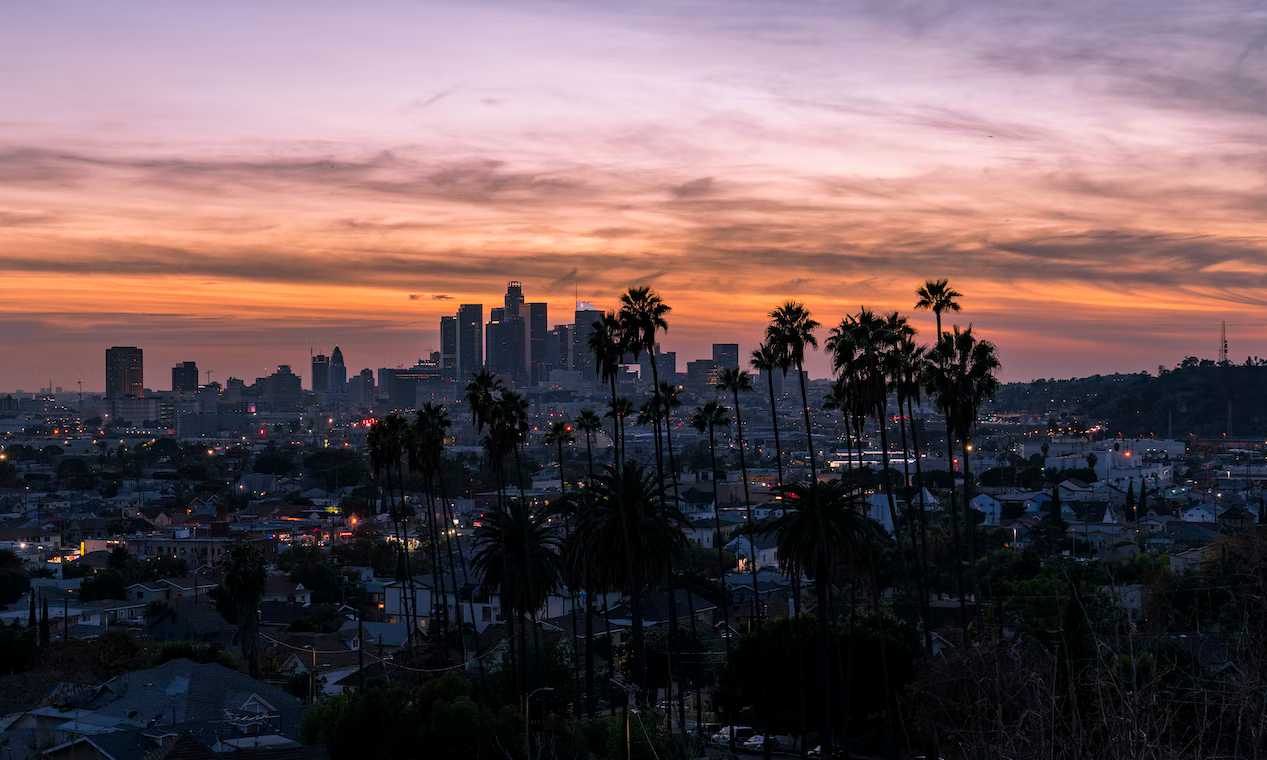


Créditos: Sterling Davis

Datos: https://www.kaggle.com/datasets/harrywang/housing

In [1]:
#Instalación de dependencias
#!pip install pandas
#!pip install scikit-learn

In [18]:
import numpy as np
import pandas as pd
# Encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [19]:
# Carga de datos
df = pd.read_csv('../data/housing.csv')

# Copia para manejo
df_house = df.copy()

# Copia para label encoder
label_encoded_df = df.copy()

# Copia para one hot encoding
# Scikit-learn
one_scikit_df = df.copy()
# Pandas
one_pandas_df = df.copy()

In [20]:
# Primeros valores
df_house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
# Estadísticos
df_house.describe(include='all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,NaN
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,NaN


In [8]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### Label Encoding

#### Documentación https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html


In [23]:
# Obtener un arreglo de los valores únicos
lista_categorias = df_house['ocean_proximity'].unique().tolist()
lista_categorias

['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND']

In [24]:
# Generar la instancia encoder
label_encoder = LabelEncoder()

In [27]:
# Agregar la columna codificada
label_encoded_df["ocean_proximity_label"] = label_encoder.fit_transform(df_house["ocean_proximity"])
#label_encoded_df["ocean_proximity"] = label_encoder.fit_transform(df_house["ocean_proximity"])

# Verificar los valores
label_encoded_df['ocean_proximity_label'].unique().tolist()

[3, 0, 1, 4, 2]

In [31]:
# Obtener los valores únicos tanto los originales como los codificados
pd.unique(label_encoded_df[['ocean_proximity_label', 'ocean_proximity']].values.ravel())

# Vista diccionario.
lista_codificada =label_encoded_df['ocean_proximity_label'].unique().tolist()

array([3, 'NEAR BAY', 0, '<1H OCEAN', 1, 'INLAND', 4, 'NEAR OCEAN', 2,
       'ISLAND'], dtype=object)

### One Hot Encoding

#### Documentación https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

#### Scikit-learn

In [13]:
# Generar la instancia encoder
one_hot_encoder = OneHotEncoder(
    categories='auto',
    drop=None,
    sparse=True,
    handle_unknown='error'
)

In [14]:
# Codificar las características
encoded_df = pd.DataFrame(one_hot_encoder.fit_transform(one_scikit_df[['ocean_proximity']]).toarray())
# Unir
one_scikit_df = one_scikit_df.join(encoded_df)

In [15]:
one_scikit_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,0,1,2,3,4
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,0.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,0.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,0.0,1.0,0.0,0.0,0.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,0.0,1.0,0.0,0.0,0.0


#### Pandas

In [16]:
# Obtener las columnas codificadas
encoded_columns = pd.get_dummies(one_pandas_df['ocean_proximity'])
# Eliminar la columna ocean_proximity
one_pandas_df = one_pandas_df.drop('ocean_proximity',axis = 1)
# Unir las columnas con el df principal
one_pandas_df = one_pandas_df.join(encoded_columns)

In [17]:
# Mostrar el resultado
one_pandas_df


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0
